In [1]:
#ref from https://link.springer.com/article/10.1007/s11042-023-14932-x#Sec3
import pandas as pd
voice2 = pd.read_csv('Voice2.csv')

#normalise 
from sklearn import preprocessing
import numpy as np

columns_to_normalize = ['Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)',
       'Jitter (ddp)', 'Shimmer (local)', 'Shimmer (local,dB)',
       'Shimmer (apq3)', 'Shimmer (apq5)', 'Shimmer (apq11)', 'Shimmer (dda)',
       'Noise to harmonics', 'Harmonics to noise']

scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
X = scaler.fit_transform(voice2[columns_to_normalize])
Y = voice2.iloc[:, 0]

print(X)
print(Y)

[[0.07116434 0.06432442 0.03963547 ... 0.07926653 0.01872258 0.55171747]
 [0.02988677 0.01590631 0.01301895 ... 0.01552217 0.01196833 0.72531478]
 [0.04161592 0.02447125 0.01764791 ... 0.02444224 0.04078217 0.68980561]
 ...
 [0.05063834 0.02080056 0.02083032 ... 0.07508589 0.02328289 0.64628893]
 [0.04071367 0.01660549 0.01562274 ... 0.03298978 0.0102918  0.62853435]
 [0.04251816 0.01782905 0.01779256 ... 0.0487396  0.01054315 0.59642147]]
0       3
1       3
2       3
3       3
4       3
       ..
5870    3
5871    3
5872    3
5873    3
5874    3
Name: levels, Length: 5875, dtype: int64


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

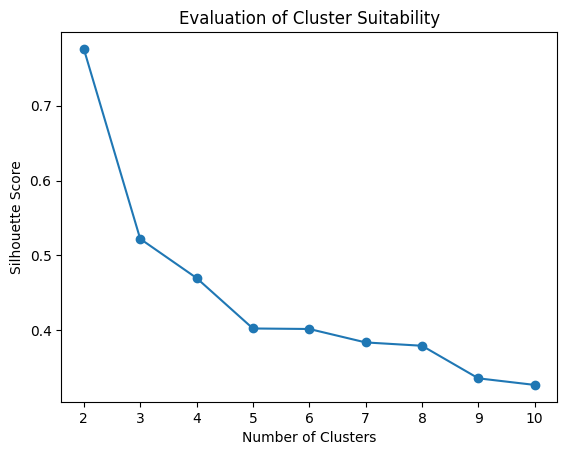

2


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [2]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Load your data
# Replace 'your_data.csv' with the actual file path or URL of your dataset
data = pd.read_csv('Voice2.csv')

X_columns = ['Jitter (local, absolute)', 'Jitter (rap)', 'Jitter (ppq5)',
       'Shimmer (local)', 'Shimmer (local,dB)',
       'Shimmer (apq3)', 'Shimmer (apq5)']
#no significant diff btw this and if include jitter ddp, shimmer apq11, shimmer dda


# Extract features (X) and target variable
X = scaler.fit_transform(voice2[X_columns])
y = data['UPDRS']

# Choose a range of cluster numbers to evaluate
cluster_range = range(2, 11)  # You can adjust the range based on your preference

# Store the results for different cluster numbers
results = []

for n_clusters in cluster_range:
    # Create KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    
    # Fit the model
    kmeans.fit(X)
    
    # Predict cluster labels
    labels = kmeans.labels_
    
    # Calculate silhouette score (a measure of how well-separated the clusters are)
    silhouette_avg = silhouette_score(X, labels)
    
    # Store the results
    results.append({'n_clusters': n_clusters, 'silhouette_score': silhouette_avg})

# Plot the results
silhouette_scores = [result['silhouette_score'] for result in results]

plt.plot(cluster_range, silhouette_scores, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Evaluation of Cluster Suitability')
plt.show()

# Choose the number of clusters that maximizes the silhouette score
best_n_clusters = max(results, key=lambda x: x['silhouette_score'])['n_clusters']
print(best_n_clusters)

# Final KMeans model with the best number of clusters
final_kmeans = KMeans(n_clusters=best_n_clusters, random_state=42)
final_kmeans.fit(X)

# Add cluster labels to the original dataset
data['cluster_labels'] = final_kmeans.labels_

# Now, 'data' contains the original data with an additional column 'cluster_labels'
# representing the assigned cluster for each data point.


In [3]:
data['cluster_labels'] = kmeans.labels_
cluster_stats = data.groupby('cluster_labels')['UPDRS'].describe()
print(cluster_stats)

                 count       mean        std      min       25%     50%  \
cluster_labels                                                            
0                621.0  30.949321  11.598877   7.0000  21.25900  30.627   
1               1586.0  26.555118  10.628353   7.0000  19.00000  26.308   
2                 59.0  30.325153   3.856718  16.1770  27.43800  31.348   
3                442.0  28.861963   9.039617   7.0000  23.61600  26.375   
4                194.0  30.536964   9.814654  12.3180  24.63375  30.421   
5               1741.0  29.169106  10.344508   7.0000  21.91400  27.424   
6                 80.0  30.482910   7.847668   7.5978  25.84925  26.493   
7               1054.0  30.834936  11.675580   7.0000  22.35975  28.929   
8                 13.0  31.028154   8.204997  11.8820  26.96400  31.348   
9                 85.0  30.053682   5.836101  13.2890  27.95000  30.877   

                     75%     max  
cluster_labels                    
0               39.67400  54.

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set

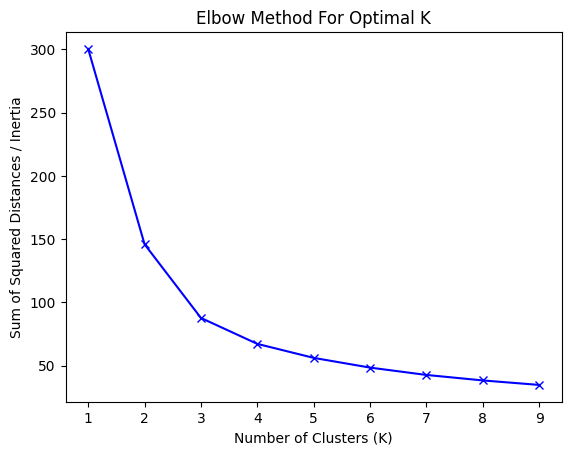

In [4]:
Sum_of_squared_distances = []
K = range(1, 10)

for num_clusters in K:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(X)
    Sum_of_squared_distances.append(kmeans.inertia_)

# Plot the elbow curve
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Sum of Squared Distances / Inertia')
plt.title('Elbow Method For Optimal K')
plt.show()

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)



Cluster 1 Stats:
count    1584.000000
mean       30.392540
std        10.819574
min         7.000000
25%        23.105000
50%        29.235000
75%        39.006500
max        54.992000
Name: UPDRS, dtype: float64

Cluster 2 Stats:
count    4138.000000
mean       28.458317
std        10.749407
min         7.000000
25%        21.020000
50%        27.114000
75%        35.896000
max        54.992000
Name: UPDRS, dtype: float64

Cluster 3 Stats:
count    153.000000
mean      29.960699
std        5.610488
min       11.882000
25%       27.438000
50%       30.877000
75%       32.000000
max       44.174000
Name: UPDRS, dtype: float64


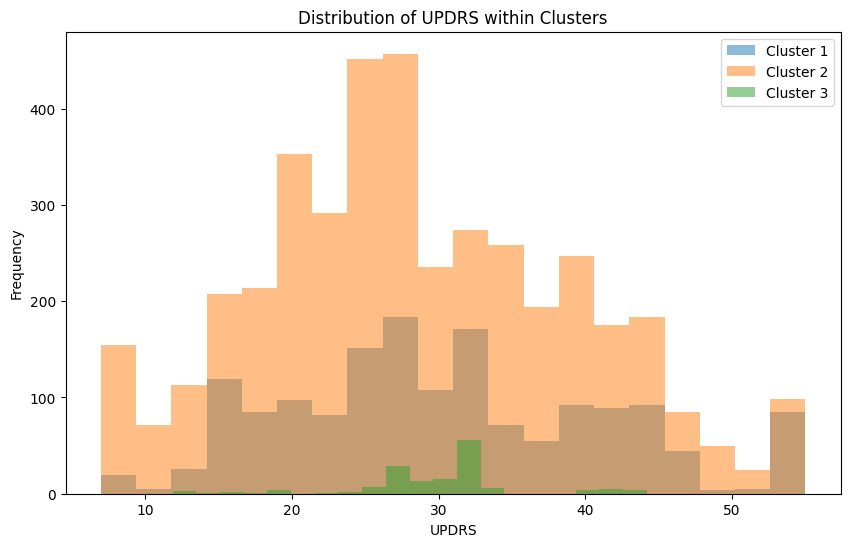

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Assuming you already have data and X defined

n_clusters = 3

# Create KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)

# Fit the model
kmeans.fit(X)

# Get cluster labels
cluster_labels = kmeans.labels_

# Add cluster labels to the original dataset
data['cluster_labels'] = cluster_labels

# Plot the distribution of the target variable within each cluster
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

for cluster in range(n_clusters):
    cluster_data = data[data['cluster_labels'] == cluster]
    print(f"\nCluster {cluster + 1} Stats:")
    print(cluster_data['UPDRS'].describe())

    # Visualize the distribution of the target variable within each cluster
    plt.hist(cluster_data['UPDRS'], bins=20, alpha=0.5, label=f'Cluster {cluster + 1}')

plt.xlabel('UPDRS')
plt.ylabel('Frequency')
plt.legend()
plt.title('Distribution of UPDRS within Clusters')
plt.show()
